<a href="https://colab.research.google.com/github/Captmoonshot/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Copy_of_LS_DS_142_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 142
## Sampling, Confidence Intervals, and Hypothesis Testing

## Prepare - examine other available hypothesis tests

If you had to pick a single hypothesis test in your toolbox, t-test would probably be the best choice - but the good news is you don't have to pick just one! Here's some of the others to be aware of:

In [0]:
import numpy as np
from scipy.stats import chisquare  # One-way chi square test

# Chi square can take any crosstab/table and test the independence of rows/cols
# The null hypothesis is that the rows/cols are independent -> low chi square
# The alternative is that there is a dependence -> high chi square
# Be aware! Chi square does *not* tell you direction/causation

ind_obs = np.array([[1, 1], [2, 2]]).T
print(ind_obs)
print(chisquare(ind_obs, axis=None))

dep_obs = np.array([[16, 18, 16, 14, 12, 12], [32, 24, 16, 28, 20, 24]]).T
print(dep_obs)
print(chisquare(dep_obs, axis=None))

[[1 2]
 [1 2]]
Power_divergenceResult(statistic=0.6666666666666666, pvalue=0.8810148425137847)
[[16 32]
 [18 24]
 [16 16]
 [14 28]
 [12 20]
 [12 24]]
Power_divergenceResult(statistic=23.31034482758621, pvalue=0.015975692534127565)


In [0]:
# Distribution tests:
# We often assume that something is normal, but it can be important to *check*

# For example, later on with predictive modeling, a typical assumption is that
# residuals (prediction errors) are normal - checking is a good diagnostic

from scipy.stats import normaltest
# Poisson models arrival times and is related to the binomial (coinflip)
sample = np.random.poisson(5, 1000)
print(normaltest(sample))  # Pretty clearly not normal

NormaltestResult(statistic=81.19413656929473, pvalue=2.338391709055123e-18)


In [0]:
# Kruskal-Wallis H-test - compare the median rank between 2+ groups
# Can be applied to ranking decisions/outcomes/recommendations
# The underlying math comes from chi-square distribution, and is best for n>5
from scipy.stats import kruskal

x1 = [1, 3, 5, 7, 9]
y1 = [2, 4, 6, 8, 10]
print(kruskal(x1, y1))  # x1 is a little better, but not "significantly" so

x2 = [1, 1, 1]
y2 = [2, 2, 2]
z = [2, 2]  # Hey, a third group, and of different size!
print(kruskal(x2, y2, z))  # x clearly dominates

KruskalResult(statistic=0.2727272727272734, pvalue=0.6015081344405895)
KruskalResult(statistic=7.0, pvalue=0.0301973834223185)


And there's many more! `scipy.stats` is fairly comprehensive, though there are even more available if you delve into the extended world of statistics packages. As tests get increasingly obscure and specialized, the importance of knowing them by heart becomes small - but being able to look them up and figure them out when they *are* relevant is still important.

## Live Lecture - let's explore some more of scipy.stats

In [0]:
# Taking requests! Come to lecture with a topic or problem and we'll try it.

from scipy import stats

b1 = stats.binom(n=100, p=0.6)

In [0]:
b1.mean() # Not randomized

60.0

In [0]:
b1.median()

60.0

In [0]:
chi2 = stats.chi2(5) # A look at the chi distribution
chi2.mean()

5.0

In [0]:
chi2.median() # Skew when median does not equal the mean, in the case of chi square a right skew

4.351460191095526

In [0]:
# Confidence Interval

# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# why? Because point estimates aren't always perfect

import numpy as np
import pandas as pd
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data
  Using t-distribution and two-tailed test, default 95% confidence
  
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
    
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  
  
  return (mean, mean - interval, mean + interval)
    
  
  

  
def report_confidence_interval(confidence_interval):
  """
  Print a pretty report of a confidence interval
  
  Arguments;
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    none, but prints to screen report
  """
  print('Mean: {:.3f}'.format(confidence_interval[0]))
  print('Lower Bound: {:.3f}'.format(confidence_interval[1]))
  print('Upper Bound: {:.3f}'.format(confidence_interval[2]))


In [0]:
coinflips = np.random.binomial(n=1, p=0.5, size=100)
print(coinflips)

[1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1
 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1]


In [0]:
import pandas as pd
df = pd.DataFrame(coinflips)
df.describe()

,0
count,100.000000
mean,0.440000
std,0.498888
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [0]:
coinflip_interval = confidence_interval(coinflips, confidence=0.95)
coinflip_interval

(0.44, 0.3410098664856729, 0.5389901335143271)

In [0]:
report_confidence_interval(coinflip_interval)

Mean: 0.440
Lower Bound: 0.341
Upper Bound: 0.539


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):

1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.

# Confidence Intervals for Drugs.com Data toward the end of this NoteBook

In [0]:
# TODO - your code!
import pandas as pd
import numpy as np
import scipy



# TODO - your code here!
names = ['Political_Party', 'handicapped_infants', 'water_project_cost_sharing', 'adoption_of_the_budget', 'physician_fee_freeze',
        'el_salvadore_aid', 'religious_groups_in_schools', 'anti_satellite_test_ban', 'aid_to_contras', 'mx_missile',
        'immigration', 'synfuels_corporation_cutback', 'education_spending', 'superfund_right_to_sue', 'crime',
        'duty_free_exports', 'export_administration_act']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None, names=names, na_values='?')
df.head()

,Political_Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [0]:
 df.shape

(435, 17)

In [0]:
# Replace y and n with 1s and 0s and replace NaNs with 0.5

df = df.replace({'y': 1, 'n': 0, np.nan: .5})
df.head()

,Political_Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.5
2,democrat,0.5,1.0,1.0,0.5,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,0.5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,1.0,1.0,1.0,1.0


In [0]:
# Change all floats to ints

df.loc[0:, 'handicapped_infants':'export_administration_act'] = df.loc[0:, 'handicapped_infants':'export_administration_act'].astype('int') 

In [0]:
df.dtypes

Political_Party                 object
handicapped_infants              int64
water_project_cost_sharing       int64
adoption_of_the_budget           int64
physician_fee_freeze             int64
el_salvadore_aid                 int64
religious_groups_in_schools      int64
anti_satellite_test_ban          int64
aid_to_contras                   int64
mx_missile                       int64
immigration                      int64
synfuels_corporation_cutback     int64
education_spending               int64
superfund_right_to_sue           int64
crime                            int64
duty_free_exports                int64
export_administration_act        int64
dtype: object

In [0]:
df.head()

,Political_Party,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
df[df['Political_Party']=='republican'].loc[0:, 'handicapped_infants':'export_administration_act']

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
7,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
8,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
10,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0
11,0,1,0,1,1,1,0,0,0,0,1,0,1,1,0,0
14,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0
15,0,1,0,1,1,1,0,0,0,1,0,1,1,0,0,0
18,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,0
28,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1


## t-test for equal means

In [0]:
# Compare democrat means against republican means for t-test

scipy.stats.ttest_ind(df[df['Political_Party']=='republican'].loc[0:, 'handicapped_infants':'export_administration_act'],
                     df[df['Political_Party']=='democrat'].loc[0:, 'handicapped_infants':'export_administration_act'], equal_var=False)

Ttest_indResult(statistic=array([ -9.38515552,  -0.06130548, -21.93889093,  48.39286776,
        23.25680962,  10.88023245, -12.27281574, -18.707842  ,
       -15.88774927,   1.6917899 ,  -8.97126987,  17.97767922,
        13.11838983,  17.60084488, -13.98857052,  -1.58710739]), pvalue=array([4.31098518e-019, 9.51150432e-001, 3.20705188e-068, 3.23549933e-173,
       3.26591129e-078, 1.54841000e-024, 3.47646201e-029, 7.27983917e-056,
       4.99554266e-045, 9.15629004e-002, 9.01200726e-018, 3.08377414e-050,
       8.72891294e-033, 3.29614480e-052, 6.83206907e-037, 1.13403594e-001]))

## Republican Immigration vs. Democrat Immigration

In [0]:
scipy.stats.ttest_ind(df[df['Political_Party']=='republican'].loc[0:, 'immigration'],
                     df[df['Political_Party']=='democrat'].loc[0:, 'immigration'], equal_var=False)

Ttest_indResult(statistic=1.6917898987720563, pvalue=0.0915629003526421)

##  Democrat handicapped_infants vs. Republican handicapped_infants

In [0]:
scipy.stats.ttest_ind(df[df['Political_Party']=='democrat'].loc[0:, 'handicapped_infants'],
                     df[df['Political_Party']=='republican'].loc[0:, 'handicapped_infants'], equal_var=False)

Ttest_indResult(statistic=9.385155523219327, pvalue=4.3109851841150087e-19)

In [0]:
df_republican_df = df[df['Political_Party']=='republican'].loc[0:, 'handicapped_infants':'export_administration_act']

df_republican_df.describe()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.184524,0.446429,0.130952,0.970238,0.934524,0.886905,0.232143,0.142857,0.113095,0.547619,0.125000,0.803571,0.809524,0.940476,0.083333,0.571429
std,0.389070,0.498608,0.338357,0.170438,0.248104,0.317656,0.423462,0.350973,0.317656,0.499215,0.331708,0.398484,0.393851,0.237310,0.277212,0.496351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df_democrat_df = df[df['Political_Party']=='democrat'].loc[0:, 'handicapped_infants':'export_administration_act']

df_democrat_df.describe()

,handicapped_infants,water_project_cost_sharing,adoption_of_the_budget,physician_fee_freeze,el_salvadore_aid,religious_groups_in_schools,anti_satellite_test_ban,aid_to_contras,mx_missile,immigration,synfuels_corporation_cutback,education_spending,superfund_right_to_sue,crime,duty_free_exports,export_administration_act
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,0.584270,0.449438,0.865169,0.052434,0.205993,0.460674,0.749064,0.816479,0.704120,0.464419,0.483146,0.134831,0.273408,0.337079,0.599251,0.647940
std,0.493773,0.498371,0.342185,0.223320,0.405185,0.499387,0.434366,0.387820,0.457295,0.499669,0.500654,0.342185,0.446546,0.473600,0.490971,0.478509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 95% confidence interval for Democrat handicapped_infants

In [0]:
demo_handicapped_mean = df_democrat_df['handicapped_infants'].mean()


In [0]:
se_demo_handicapped_infants = df_democrat_df.handicapped_infants.std()/(np.sqrt(len(df_democrat_df)))
se_demo_handicapped_infants

0.03021841692528556

In [0]:
t_value = 1.96

print("95% Confidence Interval: ({:.4f}, {:.4f})".format(demo_handicapped_mean - t_value * se_demo_handicapped_infants, demo_handicapped_mean + t_value * se_demo_handicapped_infants))

95% Confidence Interval: (0.5250, 0.6435)


## 95% Confidence Interval for Republican handicapped_infants

In [0]:
repub_handicapped_mean = df_republican_df['handicapped_infants'].mean()
se_repub_handicapped_infants = df_republican_df.handicapped_infants.std()/(np.sqrt(len(df_republican_df)))

t_value = 1.96

print("95% Confidence Interval: ({:.4f}, {:.4f}))".format(repub_handicapped_mean - t_value * se_repub_handicapped_infants, repub_handicapped_mean + t_value * se_demo_handicapped_infants))

95% Confidence Interval: (0.1257, 0.2438))


## Political Parties vs.handicapped_infants with 95% Confidence Intervals

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


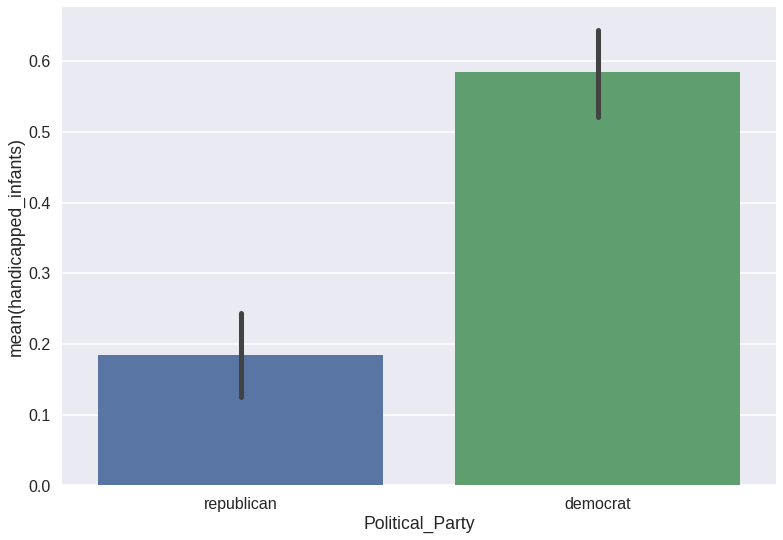

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster');


sns.barplot(x=df.Political_Party, y=df.handicapped_infants, ci=95);


In [0]:
# Drugs.com Data

!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
  

--2018-12-04 20:00:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/zip]
Saving to: ‘drugsCom_raw.zip.4’

drugsCom_raw.zip.4  100%[===================>]  41.00M  11.7MB/s    in 4.5s    

2018-12-04 20:00:52 (9.18 MB/s) - ‘drugsCom_raw.zip.4’ saved [42989872/42989872]



In [0]:
! unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
df = pd.read_table('drugsComTrain_raw.tsv')
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
df.shape

(161297, 7)

In [0]:
df.dtypes

Unnamed: 0       int64
drugName        object
condition       object
review          object
rating         float64
date            object
usefulCount      int64
dtype: object

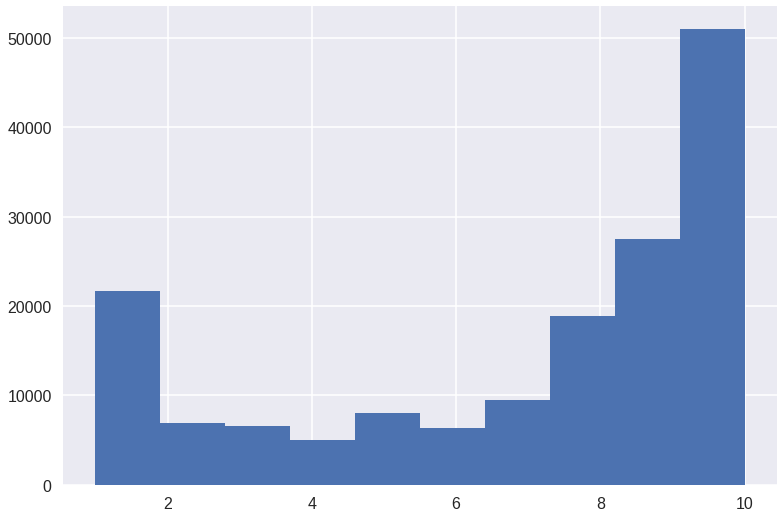

In [0]:
df['rating'].hist()

In [0]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
df['rating'].describe()

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [0]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755
std,67004.445170,3.272329,36.403742
min,2.000000,1.000000,0.000000
25%,58063.000000,5.000000,6.000000
50%,115744.000000,8.000000,16.000000
75%,173776.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [0]:
df.corr()

,Unnamed: 0,rating,usefulCount
Unnamed: 0,1.000000,0.015185,0.016475
rating,0.015185,1.000000,0.234185
usefulCount,0.016475,0.234185,1.000000


In [0]:
df['drugName'].value_counts()

Levonorgestrel                                    3657
Etonogestrel                                      3336
Ethinyl estradiol / norethindrone                 2850
Nexplanon                                         2156
Ethinyl estradiol / norgestimate                  2117
Ethinyl estradiol / levonorgestrel                1888
Phentermine                                       1543
Sertraline                                        1360
Escitalopram                                      1292
Mirena                                            1242
Implanon                                          1102
Gabapentin                                        1047
Bupropion                                         1022
Venlafaxine                                       1016
Miconazole                                        1000
Medroxyprogesterone                                995
Citalopram                                         995
Lexapro                                            952
Bupropion 

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [0]:
df['condition'].value_counts()

Birth Control                                                      28788
Depression                                                          9069
Pain                                                                6145
Anxiety                                                             5904
Acne                                                                5588
Bipolar Disorde                                                     4224
Insomnia                                                            3673
Weight Loss                                                         3609
Obesity                                                             3568
ADHD                                                                3383
Diabetes, Type 2                                                    2554
Emergency Contraception                                             2463
High Blood Pressure                                                 2321
Vaginal Yeast Infection                            

In [0]:
# Descriptive stats for Birth Control drubs

df[df['condition']=='Birth Control'].describe()

,Unnamed: 0,rating,usefulCount
count,28788.000000,28788.000000,28788.000000
mean,110572.633945,6.089933,7.792344
std,64290.776034,3.305941,17.673734
min,4.000000,1.000000,0.000000
25%,59980.500000,3.000000,2.000000
50%,107863.500000,7.000000,5.000000
75%,148931.250000,9.000000,9.000000
max,232200.000000,10.000000,1247.000000


In [0]:
# birth control DF

birth_control = df[df['condition']=='Birth Control']
birth_control.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,"August 7, 2014",10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,"August 11, 2014",11


In [0]:
birth_control[birth_control['rating'] > 6].describe()

,Unnamed: 0,rating,usefulCount
count,15122.000000,15122.000000,15122.000000
mean,113738.988031,8.923886,9.420050
std,64484.336798,1.034214,22.412292
min,4.000000,7.000000,0.000000
25%,68819.750000,8.000000,2.000000
50%,109203.000000,9.000000,5.000000
75%,149853.750000,10.000000,11.000000
max,230652.000000,10.000000,1247.000000


In [0]:
birth_control[birth_control['rating'] < 6].describe()

,Unnamed: 0,rating,usefulCount
count,12251.000000,12251.000000,12251.000000
mean,106849.382581,2.602237,5.951433
std,64008.224286,1.510905,9.910753
min,14.000000,1.000000,0.000000
25%,49500.000000,1.000000,2.000000
50%,107017.000000,2.000000,4.000000
75%,145271.500000,4.000000,7.000000
max,232200.000000,5.000000,470.000000


In [0]:
# Confidence Interval

# Similar to hypothesis testing, but centered at sample mean
# Better than reporting the "point estimate" (sample mean)
# why? Because point estimates aren't always perfect

import numpy as np
import pandas as pd
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data
  Using t-distribution and two-tailed test, default 95% confidence
  
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
    
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2., n - 1)
  
  
  return (mean, mean - interval, mean + interval)
    
  
  

  
def report_confidence_interval(confidence_interval):
  """
  Print a pretty report of a confidence interval
  
  Arguments;
    confidence_interval - tuple of (mean, lower bound, upper bound)
  
  Returns:
    none, but prints to screen report
  """
  print('Mean: {:.3f}'.format(confidence_interval[0]))
  print('Lower Bound: {:.3f}'.format(confidence_interval[1]))
  print('Upper Bound: {:.3f}'.format(confidence_interval[2]))


In [0]:
"""
coinflip_interval = confidence_interval(coinflips, confidence=0.95)
coinflip_interval
"""

birth_control_rating = birth_control['rating']
birth_control_rating_interval = confidence_interval(birth_control_rating, confidence=0.95)


## Confidence Interval of Birth Control Drugs

In [0]:
report_confidence_interval(birth_control_rating_interval)

Mean: 6.090
Lower Bound: 6.052
Upper Bound: 6.128


In [0]:
erectile_dysfunction = df[df['condition']=='Erectile Dysfunction']
erectile_dysfunction.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
76,216434,Sildenafil,Erectile Dysfunction,"""Awesome! My new boyfriend has a few issues; ...",10.0,"October 14, 2015",14
368,156065,Cialis,Erectile Dysfunction,"""I have only tried the generic version of Cial...",2.0,"November 6, 2013",34
660,156013,Cialis,Erectile Dysfunction,"""I am 60 and have ED. I have been taking Ciali...",10.0,"February 25, 2016",79
795,155931,Cialis,Erectile Dysfunction,"""I&#039;ve been taking 10mg Cialis daily for t...",10.0,"November 7, 2014",92
1104,228866,Tadalafil,Erectile Dysfunction,"""This stuff straight up works. I&#039;m a 27 y...",9.0,"January 28, 2017",75


In [0]:
hepatitis_C = df[df['condition']=='Hepatitis C']
hepatitis_C.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
45,111409,Ledipasvir / sofosbuvir,Hepatitis C,"""At initial testing my VL was over 6 million. ...",10.0,"September 22, 2015",0
46,111474,Ledipasvir / sofosbuvir,Hepatitis C,"""Side effects are light- fatigue and a bit of ...",9.0,"December 31, 2014",94
70,12559,Elbasvir / grazoprevir,Hepatitis C,"""I started taking Zepatier three days ago! No ...",10.0,"October 5, 2017",8
78,111410,Ledipasvir / sofosbuvir,Hepatitis C,"""Had hep-c since early 70s and cirrhosis for t...",10.0,"September 18, 2015",36
227,5477,Sovaldi,Hepatitis C,"""My father has started the treatment 2 months ...",1.0,"August 10, 2016",4


## Confidence Intervals of Some Sexually Disease Related Drugs

In [0]:
erectile_dysfunction_interval = confidence_interval(erectile_dysfunction['rating'], confidence=0.95)
report_confidence_interval(erectile_dysfunction_interval)

Mean: 8.353
Lower Bound: 8.195
Upper Bound: 8.511


In [0]:
hepatitis_C_interval = confidence_interval(hepatitis_C['rating'], confidence=0.95)
report_confidence_interval(hepatitis_C_interval)

Mean: 8.412
Lower Bound: 8.205
Upper Bound: 8.618


## Confidence Interval for Prostate Cancer

In [0]:
prostate = df[df['condition']=='Prostate Cance']
prostate_confidence_interval = confidence_interval(prostate['rating'], confidence=0.95)
report_confidence_interval(prostate_confidence_interval)

Mean: 7.041
Lower Bound: 6.468
Upper Bound: 7.613


In [0]:
df.groupby(df['condition']=='Prostate Cance').mean()

,Unnamed: 0,rating,usefulCount
condition,,,
False,115908.382506,6.994342,27.990439
True,135844.691057,7.040650,46.764228


In [0]:
birth_control_versus_rest = df.groupby(df['condition']=='Birth Control')['rating'].mean()
birth_control_versus_rest

condition
False    7.190870
True     6.089933
Name: rating, dtype: float64

In [0]:
erectile_dysfunction.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
76,216434,Sildenafil,Erectile Dysfunction,"""Awesome! My new boyfriend has a few issues; ...",10.0,"October 14, 2015",14
368,156065,Cialis,Erectile Dysfunction,"""I have only tried the generic version of Cial...",2.0,"November 6, 2013",34
660,156013,Cialis,Erectile Dysfunction,"""I am 60 and have ED. I have been taking Ciali...",10.0,"February 25, 2016",79
795,155931,Cialis,Erectile Dysfunction,"""I&#039;ve been taking 10mg Cialis daily for t...",10.0,"November 7, 2014",92
1104,228866,Tadalafil,Erectile Dysfunction,"""This stuff straight up works. I&#039;m a 27 y...",9.0,"January 28, 2017",75


In [0]:
everything_but_birth_control = df.groupby(df['condition']!='Birth Control')['rating'].mean()
everything_but_birth_control

condition
False    6.089933
True     7.190870
Name: rating, dtype: float64

In [0]:
hepatitis_C = df.groupby(df['condition']!='Hepatitis C')['rating'].mean()
hepatitis_C

condition
False    8.411585
True     6.988589
Name: rating, dtype: float64

In [0]:
hepatitis_C[1]

6.988589463462005

In [0]:
type(birth_control_versus_rest)

pandas.core.frame.DataFrame

# Confidence Interval Plots: Erectile Dysfunction vs. Birth Control

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


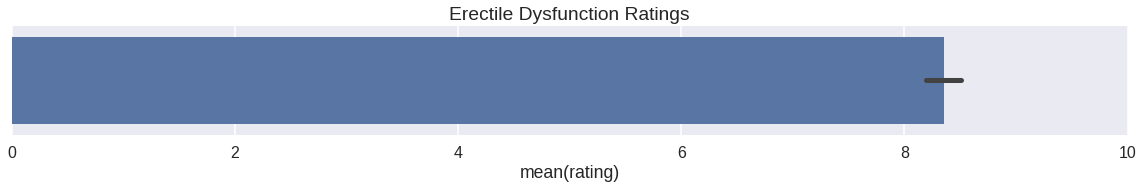

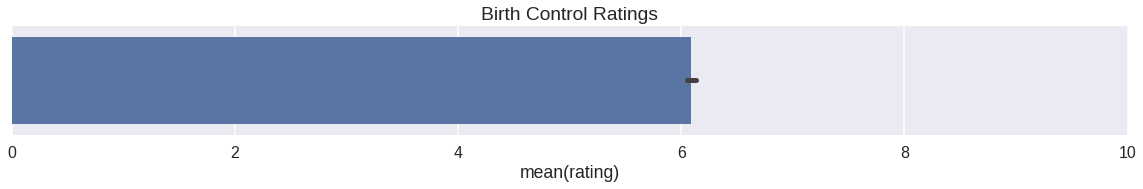

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('poster');


#sns.barplot(x=birth_control_versus_rest.rating, ci=95);

plt.figure(figsize=(20, 2))
plt.xlim(0, 10)
plt.title('Erectile Dysfunction Ratings')
sns.barplot(erectile_dysfunction['rating'], ci=95)

plt.figure(figsize=(20, 2))
plt.xlim(0, 10)
plt.title('Birth Control Ratings')
sns.barplot(birth_control_rating, ci=95)


## With respect to these features, the confidence interval says that if we were to repeatedly take more samples of ratings for these drugs over and over, 95 % of the time their means would land somewhere in the Confidence Interval.  The Birth Control Ratings have a pretty tight range perhaps to the the abundance of ratings data compared to all the other drugs.